### Principal Component Analysis (PCA)
- It is a technique used to analyze high-dimensional datasets.
- It is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
- There are essentially three steps in PCA:
1. Data standardization: Data need to be centered (mean value = 0)
 $$X_{norm} = \frac{X-mean(x)}{std(X)}$$
2. Covariance matrix: calculating a square matrix giving the covariances between each pair of features
$$Cov(X,Y)=\frac{\sum (x_i-\bar{X})(y_i-\bar{Y})}{n}$$
Covariance matrix is:
\begin{pmatrix} 1 & ... & Cov(x_{1},x_{n})\\ : &. & :\\ :& \: \: \: \: \: \: \: \: \: \: .& :\\ Cov(x_{n},x_{1}) & ... & 1 \end{pmatrix}
3. Eigendecomposition: decomposing the covariance matrix into eigenvectors and eigenvalues. Eigenvectors are simple unit vectors (give the directions), and eigenvalues are coefficients representing the magnitude of those eigenvectors (importance of these directions). Eigendecomposition is a procedure that decomposes a square matrix X into the product of three parts:
$$X = WDW^{-1}$$
Where W is a square matrix composed of the eigenvectors and D is a diagonal matrix containing the eigenvalues.

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

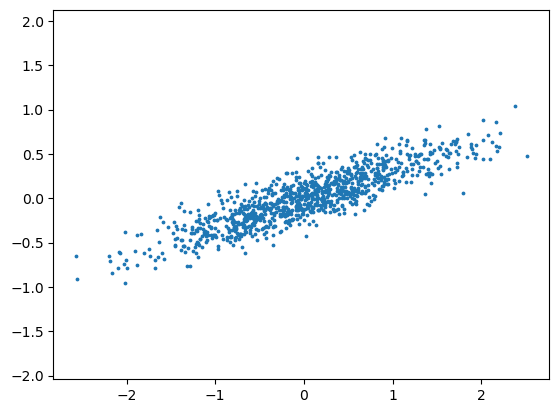

In [207]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 1000)).T
f, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s = 3)
ax.axis('equal')
plt.show()

In [208]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)


[[-0.95005388 -0.31208594]
 [ 0.31208594 -0.95005388]]
[0.80465491 0.02013248]


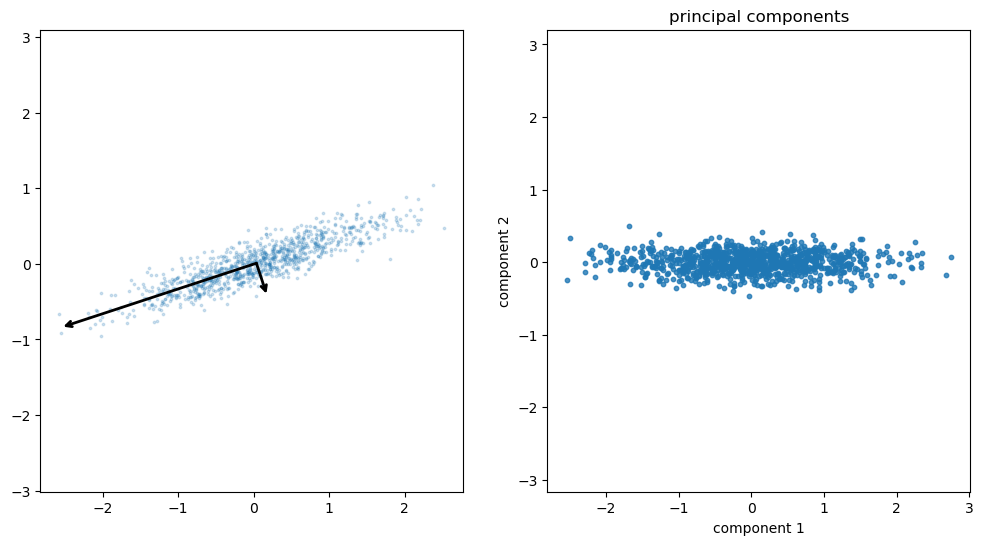

In [209]:
X_pca = pca.transform(X)
arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.scatter(X[:, 0], X[:, 1], s = 3, alpha=.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax1.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)
ax2.scatter(X_pca[:, 0], X_pca[:, 1],s = 10, alpha=0.8)
ax1.axis('equal')
ax2.axis('equal')
ax2.set(xlabel='component 1', ylabel='component 2',title='principal components')
plt.show()

the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.

original shape:    (1000, 2)
transformed shape: (1000, 1)


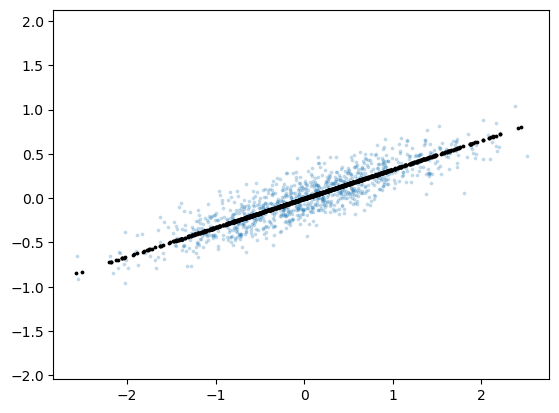

In [210]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
f, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s = 3, alpha=.2)
plt.scatter(X_new[:, 0], X_new[:, 1], s = 3, color='black')
ax.axis('equal')
plt.show()

Existen 1797 imagenes con 64 pixeles cada una


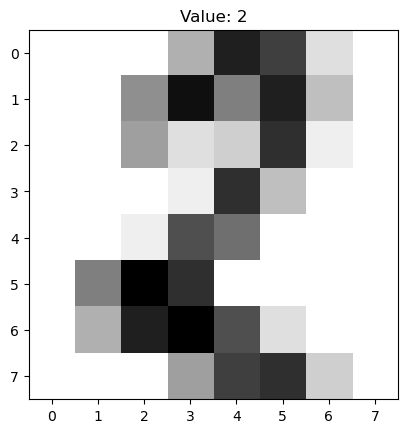

In [211]:
from sklearn.datasets import load_digits
digits = load_digits()
print(f'Existen {digits.data.shape[0]} imagenes con {digits.data.shape[1]} pixeles cada una')

def plot_digit(dgts, n):
    f, ax = plt.subplots()
    ax.imshow(dgts.data[n].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
    ax.set_title(f'Value: {dgts.target[n]}')
    plt.show()

plot_digit(digits, 50)


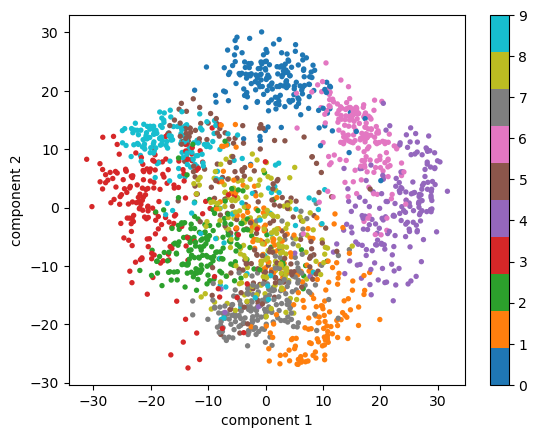

In [212]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)

f, ax = plt.subplots()
scatter = ax.scatter(projected[:, 0], projected[:, 1], s = 15, c=digits.target, edgecolor='none', cmap=plt.get_cmap('tab10', 10))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
plt.colorbar(scatter, ax=ax)
plt.show()

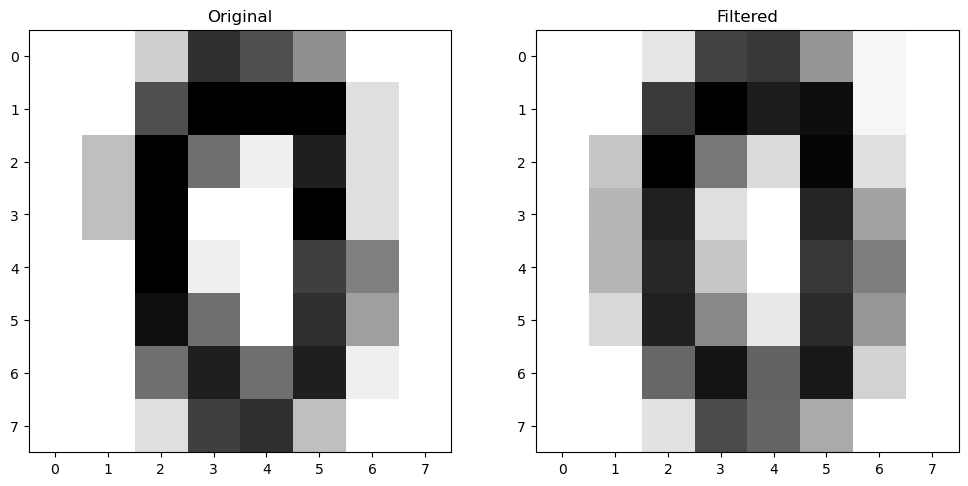

In [213]:
val = 20
pca = PCA(n_components=20)
Xproj = pca.fit_transform(digits.data)
filtered = pca.inverse_transform(Xproj)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.imshow(digits.data[val].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
ax2.imshow(filtered[val].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
ax1.set_title('Original')
ax2.set_title('Filtered')
plt.show()


Con 20 componentes se explica más del 90% de la varianza


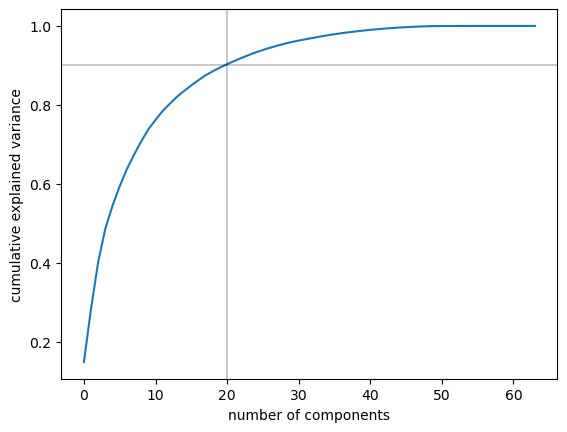

In [214]:
pca = PCA().fit(digits.data)
exp_var = np.cumsum(pca.explained_variance_ratio_)
n_comp_90 = np.where(exp_var > 0.9)[0][0]

print(f'Con {n_comp_90} componentes se explica más del 90% de la varianza' )

f,ax = plt.subplots()
ax.plot(exp_var)
ax.axhline(0.9, color='black', linewidth=.3)
ax.axvline(n_comp_90, color='black', linewidth=.3)
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance')
plt.show()